In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import jinja2
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [3]:
df = pd.read_csv('train.csv')
df.shape

(1677, 35)

In [5]:
df.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


In [6]:
df1 = df.drop(['id'],axis=1)
df1.shape

(1677, 34)

In [8]:
df1.isnull().values.any()

False

In [9]:
numerical = [var for var in df1.columns if df1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
if len(numerical)>1:
    print('The numerical variables :', numerical)

There are 26 numerical variables

The numerical variables : ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']


In [10]:
categorical = [var for var in df1.columns if df1[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
if len(categorical)>1:
    print('The categorical variables :', categorical)

There are 8 categorical variables

The categorical variables : ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'DailyRate'}>,
        <AxesSubplot: title={'center': 'DistanceFromHome'}>,
        <AxesSubplot: title={'center': 'Education'}>,
        <AxesSubplot: title={'center': 'EmployeeCount'}>],
       [<AxesSubplot: title={'center': 'EnvironmentSatisfaction'}>,
        <AxesSubplot: title={'center': 'HourlyRate'}>,
        <AxesSubplot: title={'center': 'JobInvolvement'}>,
        <AxesSubplot: title={'center': 'JobLevel'}>,
        <AxesSubplot: title={'center': 'JobSatisfaction'}>],
       [<AxesSubplot: title={'center': 'MonthlyIncome'}>,
        <AxesSubplot: title={'center': 'MonthlyRate'}>,
        <AxesSubplot: title={'center': 'NumCompaniesWorked'}>,
        <AxesSubplot: title={'center': 'PercentSalaryHike'}>,
        <AxesSubplot: title={'center': 'PerformanceRating'}>],
       [<AxesSubplot: title={'center': 'RelationshipSatisfaction'}>,
        <AxesSubplot: title={'center': 'StandardHours'}>,

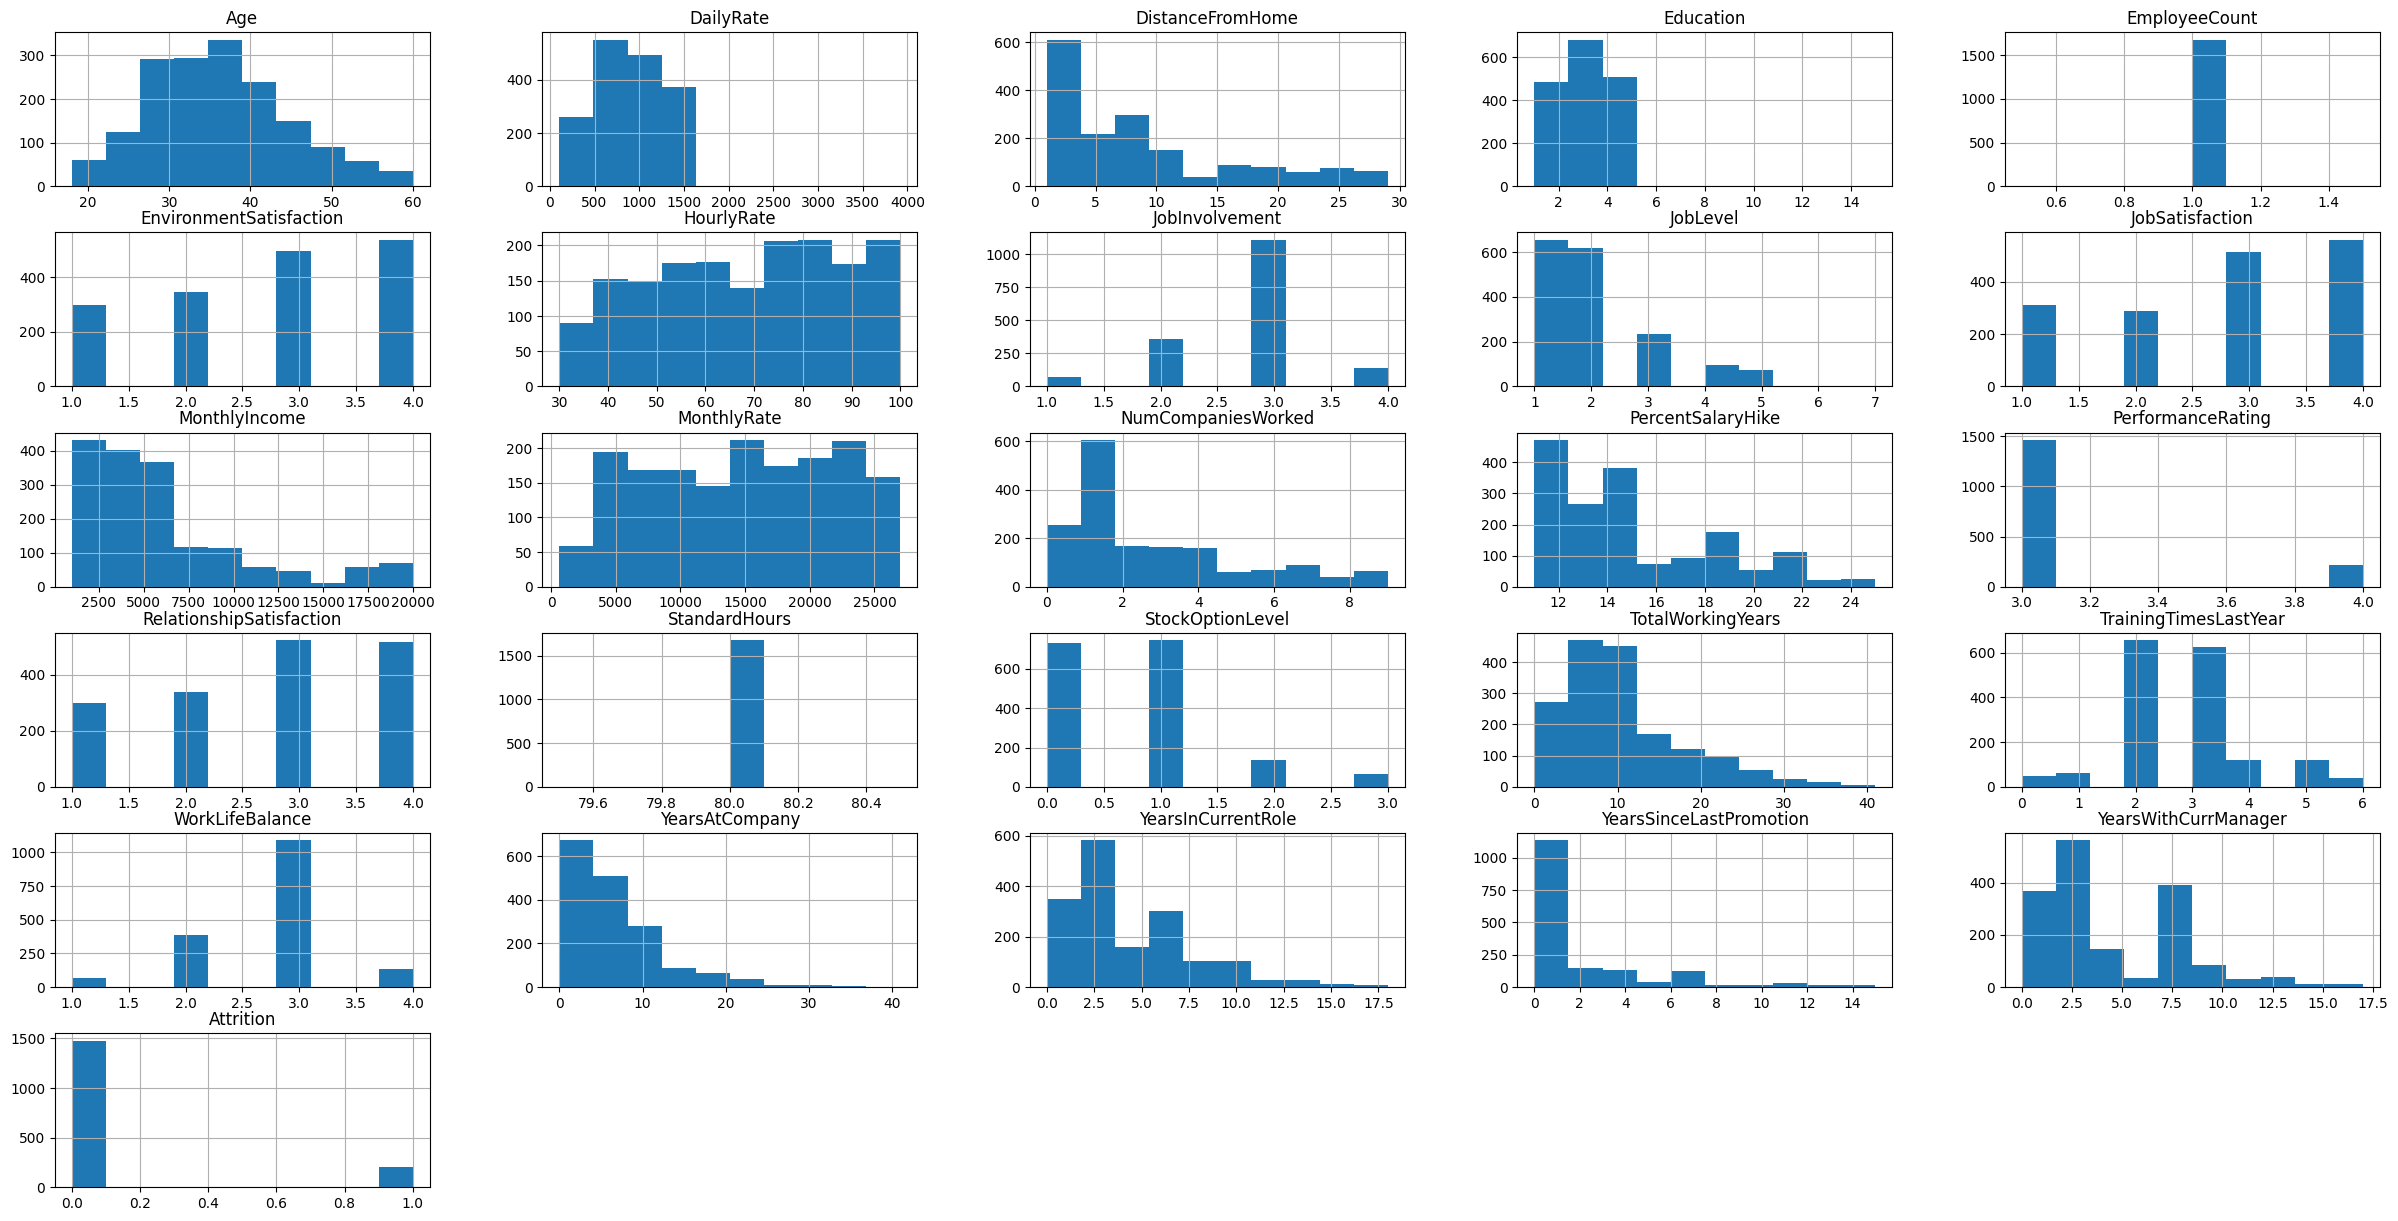

In [11]:
df1[numerical].hist(figsize=(30,15))

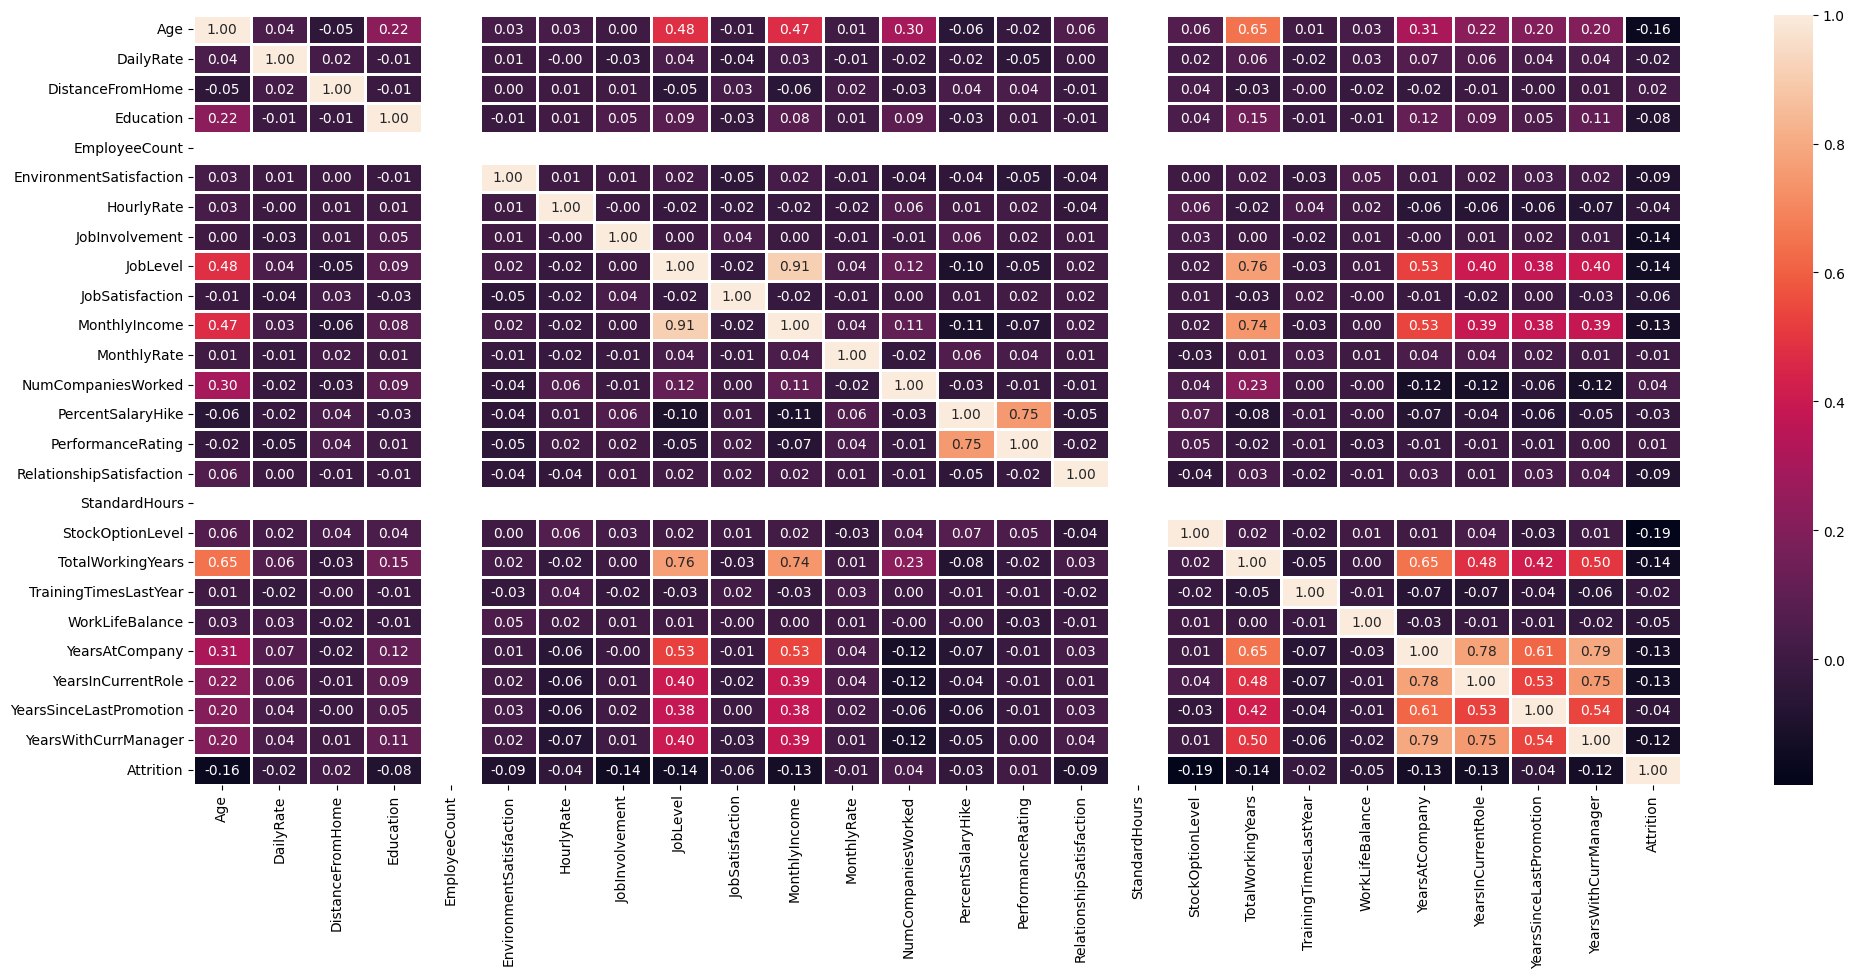

In [13]:
plt.figure(figsize=(24,10))
sns.heatmap(df1[numerical].corr(),annot=True,fmt='.2f',linewidths=2)
plt.show()

In [15]:
df1[categorical].nunique()

BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [18]:
df2 = pd.get_dummies(data=df1,columns=categorical,drop_first=True)
df2.shape

(1677, 47)

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1677 non-null   int64
 1   DailyRate                          1677 non-null   int64
 2   DistanceFromHome                   1677 non-null   int64
 3   Education                          1677 non-null   int64
 4   EmployeeCount                      1677 non-null   int64
 5   EnvironmentSatisfaction            1677 non-null   int64
 6   HourlyRate                         1677 non-null   int64
 7   JobInvolvement                     1677 non-null   int64
 8   JobLevel                           1677 non-null   int64
 9   JobSatisfaction                    1677 non-null   int64
 10  MonthlyIncome                      1677 non-null   int64
 11  MonthlyRate                        1677 non-null   int64
 12  NumCompaniesWorked  

In [23]:
numerical.remove('Attrition')

In [24]:
df2[numerical].describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,...,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,36.036971,892.749553,8.683959,2.937984,1.0,2.757901,67.798450,2.782349,1.998807,2.791890,...,2.751342,80.0,0.721527,10.709600,2.732856,2.769827,6.806798,4.144305,1.978533,4.186643
std,8.507112,374.496259,7.826143,1.039078,0.0,1.086835,19.435928,0.650664,1.083065,1.097396,...,1.077905,0.0,0.771259,7.255135,1.145271,0.647721,5.883282,3.583398,3.045716,3.576189
min,18.000000,107.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,589.000000,2.000000,2.000000,1.0,2.000000,51.000000,2.000000,1.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.000000,890.000000,7.000000,3.000000,1.0,3.000000,69.000000,3.000000,2.000000,3.000000,...,3.000000,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,41.000000,1223.000000,12.000000,4.000000,1.0,4.000000,84.000000,3.000000,2.000000,4.000000,...,4.000000,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,3921.000000,29.000000,15.000000,1.0,4.000000,100.000000,4.000000,7.000000,4.000000,...,4.000000,80.0,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000


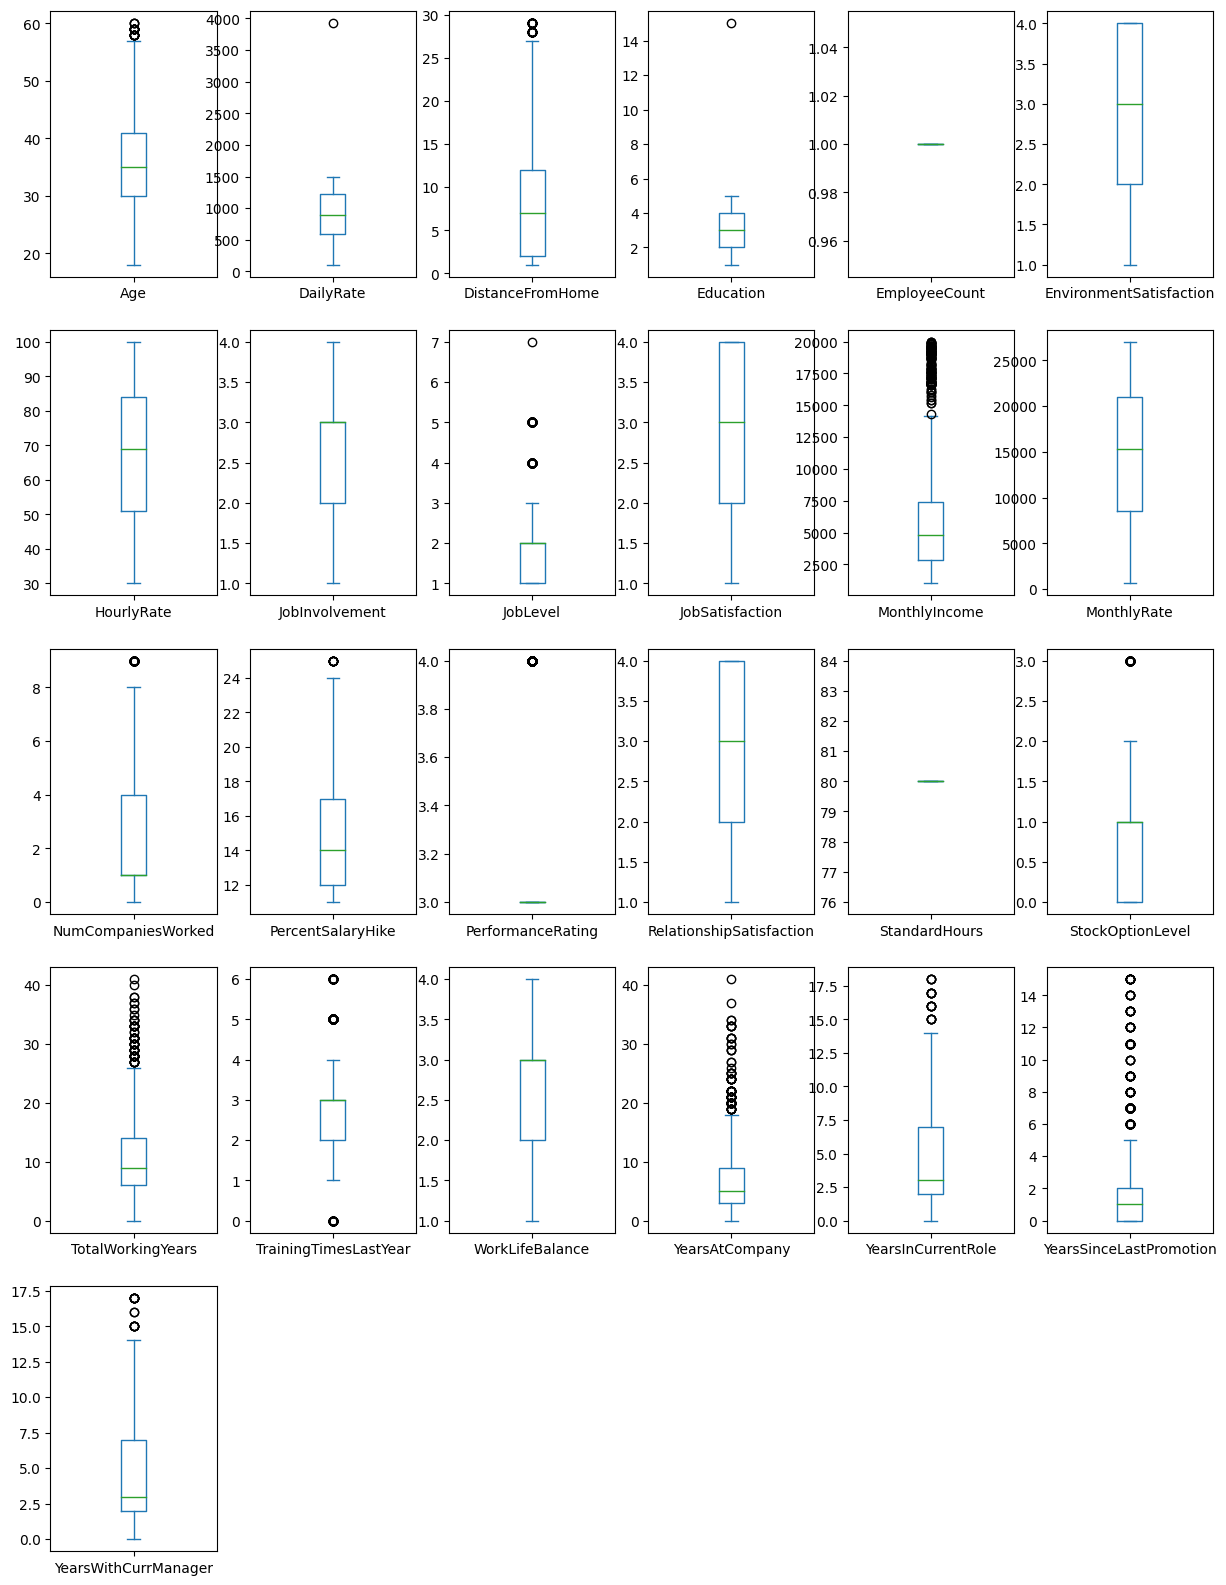

In [31]:
df2[numerical].plot(kind = "box",subplots = True,layout = (5,6),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

In [32]:
new_list = ['JobLevel','Education','PerformanceRating','TrainingTimesLastYear']

In [34]:
rem_list = []

In [35]:
rem_list = [ ele for ele in numerical ]
for a in new_list:
  if a in numerical:
    rem_list.remove(a)

In [38]:
len(numerical),len(new_list),len(rem_list)

(25, 4, 21)

In [39]:
#Using the InterQuartile Range to fill the values
def remove_outlier(i , col):
    Q1 = i[col].quantile(0.25)
    Q3 = i[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df2[col] = np.clip(i[col] , lower_whisker , upper_whisker)
    return i

def treat_outliers_all(df , col_list):
    for c in col_list:
        i = remove_outlier(df , c)
    return i

In [41]:
df3 = treat_outliers_all(df2 , rem_list)

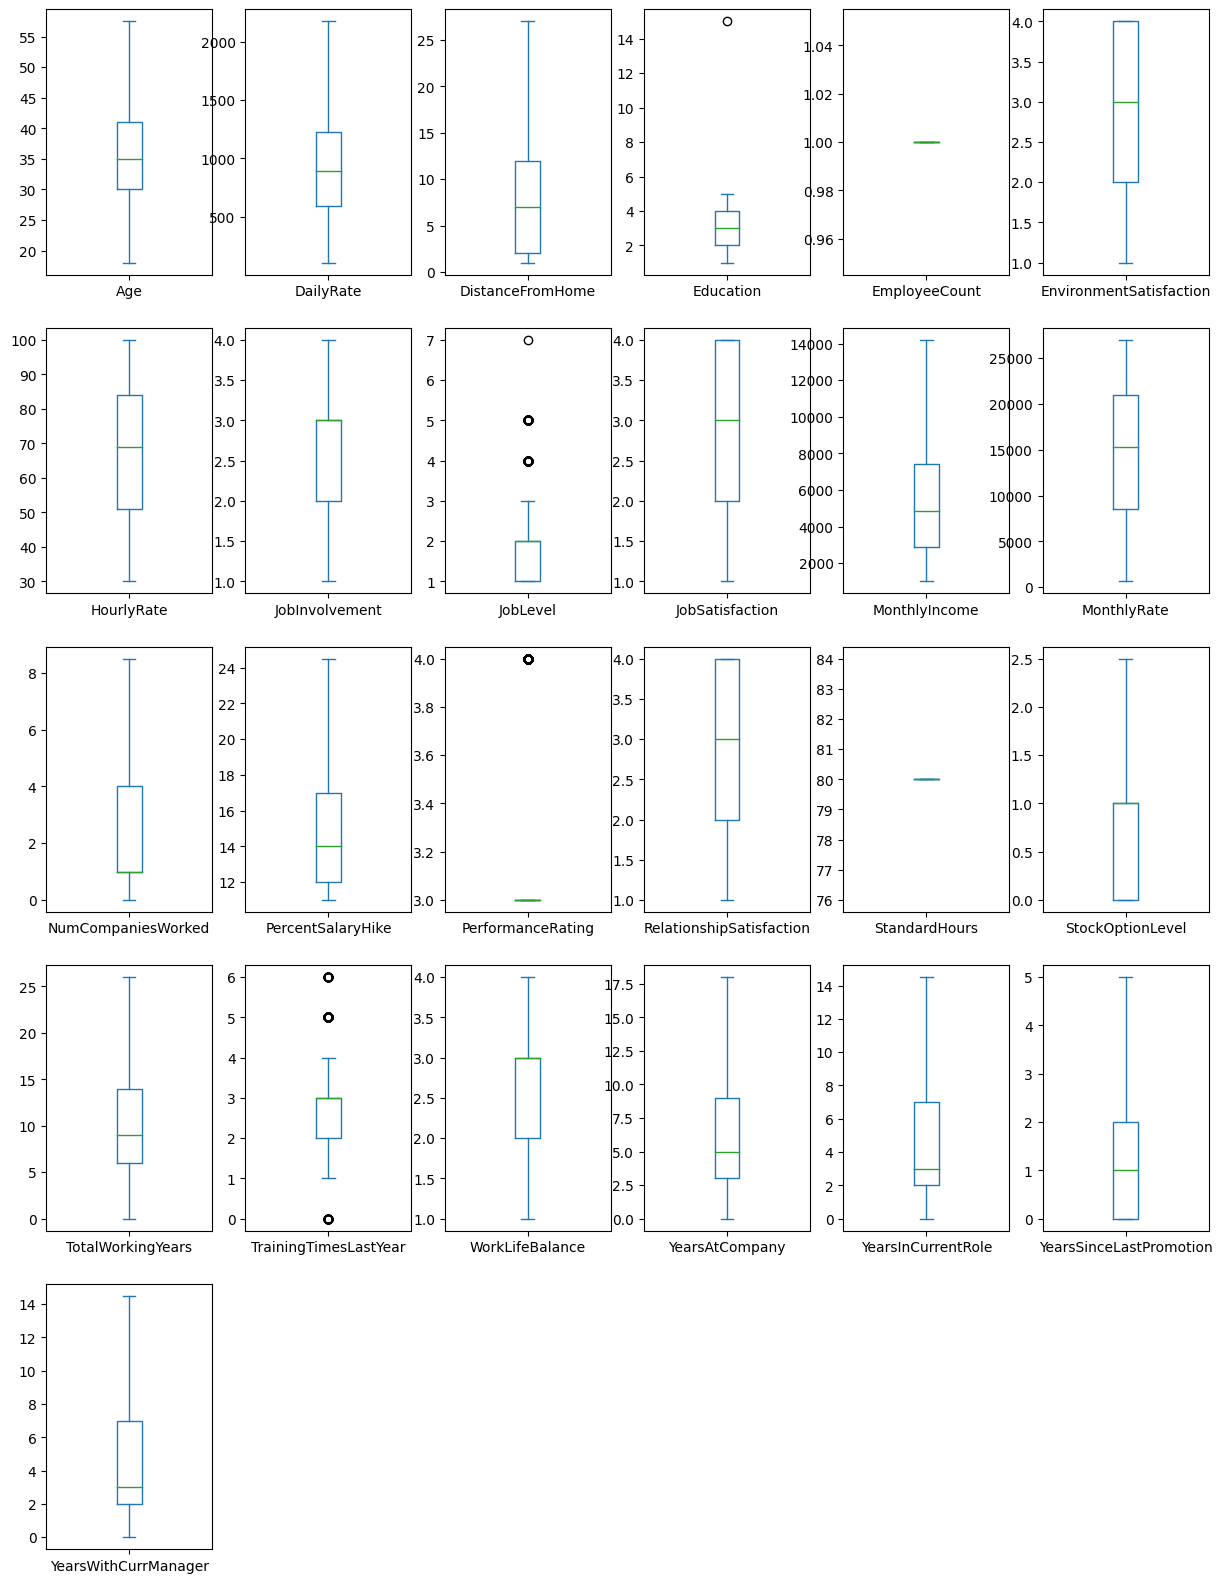

In [42]:
df3[numerical].plot(kind = "box",subplots = True,layout = (5,6),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

Feature Engineering

In [43]:
X = df3.drop(['Attrition'],axis=1)
y = df3.Attrition

X.shape, y.shape

((1677, 46), (1677,))

In [44]:
y.value_counts()

0    1477
1     200
Name: Attrition, dtype: int64

smote because there is huge imbalance

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [47]:
y.value_counts()

0    1477
1    1477
Name: Attrition, dtype: int64

In [48]:
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2363, 46), (591, 46), (2363,), (591,))

In [49]:
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
scaler = MinMaxScaler()
X_train_RF = scaler.fit_transform(X_train)
X_test_RF = scaler.transform(X_test)

X_train_RF = pd.DataFrame(X_train_RF,columns=cols)
X_test_RF = pd.DataFrame(X_test_RF,columns=cols)

In [50]:
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train_RF, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [51]:
print('Training set score: {:.4f}'.format(logreg.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test_RF, y_test)))

Training set score: 0.9141
Test set score: 0.9239


In [52]:
from math import sqrt
print(sqrt(X_train.shape[1]))

6.782329983125268


In [53]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,15)
#20 because sqrt of len(X_train)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

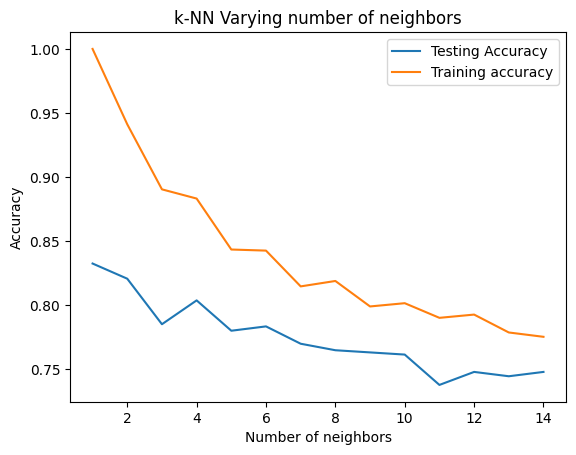

In [54]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [55]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,10)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,verbose=1,cv=6)
knn_cv.fit(X_train,y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Fitting 6 folds for each of 9 candidates, totalling 54 fits
Best Score:0.7955927117104317
Best Parameters: {'n_neighbors': 1}


In [56]:
print('Training set score: {:.4f}'.format(knn_cv.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn_cv.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.8325


Random Forests

In [57]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=12,n_estimators=10)

# fit the model
rfc.fit(X_train_RF, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test_RF)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9272


In [58]:
print('Training set score: {:.4f}'.format(rfc.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(rfc.score(X_test_RF, y_test)))

Training set score: 0.9979
Test set score: 0.9272


In [59]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc_100 = RandomForestClassifier(random_state=12,n_estimators=100)

# fit the model
rfc_100.fit(X_train_RF, y_train)

# Predict the Test set results
y_pred = rfc_100.predict(X_test_RF)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees : 0.9492


In [60]:
print('Training set score: {:.4f}'.format(rfc_100.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(rfc_100.score(X_test_RF, y_test)))

Training set score: 1.0000
Test set score: 0.9492


In [61]:
rfc_100.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 12,
 'verbose': 0,
 'warm_start': False}

Gridsearch RF

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {
    'n_estimators': [100, 150, 200, 250, 300,500,1000],
    'max_depth': [10, 20, None],
    'bootstrap':[True],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10]
}
regr = RandomForestClassifier(random_state=12)

clf = GridSearchCV(regr, parameters,verbose=10,n_jobs=6,cv=3)
clf.fit(X_train_RF, y_train)
print("Best params: ", clf.best_params_)

Fitting 3 folds for each of 189 candidates, totalling 567 fits
Best params:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}


In [63]:
clf.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 12,
 'verbose': 0,
 'warm_start': False}

In [64]:
y_pred = clf.predict(X_test_RF)

In [72]:
print('Training set score: {:.4f}'.format(clf.best_estimator_.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(clf.best_estimator_.score(X_test_RF, y_test)))

Training set score: 1.0000
Test set score: 0.9543


TEsting on original data without oversampling

In [66]:
X_test_old_data = df3.loc[df3['Attrition']==1]

In [67]:
y_test_old_data = X_test_old_data['Attrition']
X_test_old_data=X_test_old_data.drop(['Attrition'],axis=1)
X_test_old_data.shape, y_test_old_data.shape

((200, 46), (200,))

In [70]:
y_pred_old = clf.best_estimator_.predict(X_test_old_data)

In [71]:
old_accuracy = rfc_100.score(X_test_old_data, y_pred_old)
old_accuracy

1.0

Test data

In [73]:
test_data = pd.read_csv('test.csv')
test_data.shape

(1119, 34)

In [74]:
test_df = test_data.drop(['id'],axis=1)
test_df.shape

(1119, 33)

In [75]:
test_df.isnull().values.any()

False

In [76]:
numerical = [var for var in test_df.columns if test_df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
if len(numerical)>1:
    print('The numerical variables :', numerical)

There are 25 numerical variables

The numerical variables : ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [77]:
categorical = [var for var in test_df.columns if test_df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
if len(categorical)>1:
    print('The categorical variables :', categorical)

There are 8 categorical variables

The categorical variables : ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [78]:
test_df_2 = pd.get_dummies(data=test_df,columns=categorical,drop_first=True)
test_df_2.shape

(1119, 46)

In [82]:
y_pred = clf.best_estimator_.predict_proba(test_df_2)

In [85]:
sub_pred = y_pred[:, 1]

In [86]:
sub_pred

array([0.245, 0.195, 0.178, ..., 0.214, 0.158, 0.162])

In [87]:
sample = pd.read_csv('sample_submission.csv')

In [88]:
submission = pd.DataFrame(data={'id': sample.id, 'Attrition': sub_pred})
submission.head()

,id,Attrition
0,1677,0.245
1,1678,0.195
2,1679,0.178
3,1680,0.171
4,1681,0.209


In [89]:
submission.to_csv('submission_rfcv.csv',index=False)

Culmination of LR, rfc100, rfcv

In [109]:
y_pred_clf = clf.best_estimator_.predict_proba(test_df_2)
y_pred_clf = y_pred_clf[:, 1]
y_pred_clf

array([0.245, 0.195, 0.178, ..., 0.214, 0.158, 0.162])

In [111]:
y_pred_rfc100 = rfc_100.predict_proba(test_df_2)
y_pred_rfc100 = y_pred_rfc100[:, 1]
y_pred_rfc100

array([0.2 , 0.14, 0.12, ..., 0.18, 0.14, 0.11])

In [114]:
y_pred_LR = logreg.predict_proba(test_df_2)
y_pred_LR = y_pred_LR[:, 1]
y_pred_LR

array([1.00000000e+000, 5.22022915e-105, 1.00000000e+000, ...,
       0.00000000e+000, 1.00000000e+000, 1.00000000e+000])

In [120]:
y_pred_mean = [(g + h) / 2 for g, h in zip(y_pred_clf, y_pred_rfc100)]

In [124]:
submission = pd.DataFrame(data={'id': sample.id, 'Attrition': y_pred_mean})
submission.head()

,id,Attrition
0,1677,0.2225
1,1678,0.1675
2,1679,0.1490
3,1680,0.1555
4,1681,0.1895


In [125]:
submission.to_csv('submission_mean_rf.csv',index=False)

Doing Outlier removal on test

test clipping on train data

In [137]:
#Using the InterQuartile Range to fill the values
def remove_outlier(i , col):
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    test_df_2[col] = np.clip(i[col] , lower_whisker , upper_whisker)
    return i

def treat_outliers_all(df , col_list):
    for c in col_list:
        i = remove_outlier(df , c)
    return i

In [138]:
test_df_3 = treat_outliers_all(test_df_2, rem_list)

Now predicting again!

In [140]:
y_pred_clf = clf.best_estimator_.predict_proba(test_df_3)
y_pred_clf = y_pred_clf[:, 1]
y_pred_clf

array([0.245, 0.195, 0.178, ..., 0.214, 0.158, 0.162])

In [141]:
submission = pd.DataFrame(data={'id': sample.id, 'Attrition': y_pred_clf})
submission.head()

,id,Attrition
0,1677,0.245
1,1678,0.195
2,1679,0.178
3,1680,0.171
4,1681,0.209


In [143]:
df3.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
count,1119.000000,1119.000000,1119.000000,1677.000000,1119.0,1119.000000,1119.000000,1119.000000,1677.000000,1119.000000,...,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,36.136282,883.550492,8.628239,2.937984,1.0,2.736372,68.226095,2.742181,1.998807,2.767650,...,0.199165,0.066190,0.116875,0.042338,0.205128,0.211688,0.045915,0.460942,0.344067,0.238521
std,8.758332,366.427230,7.674234,1.039078,0.0,1.106668,19.495282,0.651041,1.083065,1.103576,...,0.399492,0.248687,0.321368,0.201418,0.403916,0.408626,0.209364,0.498621,0.475205,0.426306
min,18.000000,6.000000,1.000000,1.000000,1.0,0.000000,30.000000,0.500000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,589.000000,2.000000,2.000000,1.0,2.000000,52.000000,2.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,889.000000,7.000000,3.000000,1.0,3.000000,71.000000,3.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,41.000000,1206.000000,12.000000,4.000000,1.0,4.000000,85.000000,3.000000,2.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,57.500000,1499.000000,27.000000,15.000000,1.0,4.000000,100.000000,4.000000,7.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [144]:
test_df_3.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
count,1119.000000,1119.000000,1119.000000,1119.000000,1119.0,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,...,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000
mean,36.136282,883.550492,8.628239,2.941912,1.0,2.736372,68.226095,2.742181,1.999106,2.767650,...,0.205541,0.063450,0.104558,0.041108,0.205541,0.214477,0.039321,0.468275,0.352100,0.238606
std,8.758332,366.427230,7.674234,1.012986,0.0,1.106668,19.495282,0.651041,1.091109,1.103576,...,0.404277,0.243879,0.306119,0.198629,0.404277,0.410643,0.194444,0.499216,0.477839,0.426422
min,18.000000,6.000000,1.000000,1.000000,1.0,0.000000,30.000000,0.500000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,589.000000,2.000000,2.000000,1.0,2.000000,52.000000,2.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,889.000000,7.000000,3.000000,1.0,3.000000,71.000000,3.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,41.000000,1206.000000,12.000000,4.000000,1.0,4.000000,85.000000,3.000000,2.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,57.500000,1499.000000,27.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [142]:
submission.to_csv('submission_rfcv_outlier.csv',index=False)